# Problem and feature description
Features: 
Serial: the serial number <br>
Data: year of the sale of the house <br>
Age: age of the house at the time of the sale<br>
Distance: distance from the city center<br>
Stores: number of stores in the locality<br>
Latitude: the latitude<br>
Longitude: the longitude<br>
Price: the price

In [2]:
#read data
import pandas as pd
df = pd.read_csv('data.csv')
df

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157
...,...,...,...,...,...,...,...,...
4995,4995,2007,17,6,3,90,125,13539
4996,4996,2016,7,10,0,85,129,14757
4997,4997,2017,6,10,5,90,125,14102
4998,4998,2010,37,3,5,81,128,14313


# Explatory Data Analysis

In [3]:
df.isnull().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

# Data Visualization

# Data Preparation

In [4]:
#remove serial number
df = df.iloc[:, 1:]
df

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157
...,...,...,...,...,...,...,...
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313


In [5]:
#normalize data
df_norm = (df - df.mean())/df.std()
df_norm

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266
...,...,...,...,...,...,...,...
4995,-0.350485,-0.171675,0.319454,-0.609312,1.590328,0.001831,-0.360156
4996,1.298598,-1.054324,1.569518,-1.563848,0.009045,1.264460,0.833055
4997,1.481830,-1.142588,1.569518,0.027045,1.590328,0.001831,0.191385
4998,0.199209,1.593622,-0.618094,0.027045,-1.255981,0.948803,0.398091


In [6]:
# convert label value back to original
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)


In [7]:
x = df_norm.iloc[:, :6]
x

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141
...,...,...,...,...,...,...
4995,-0.350485,-0.171675,0.319454,-0.609312,1.590328,0.001831
4996,1.298598,-1.054324,1.569518,-1.563848,0.009045,1.264460
4997,1.481830,-1.142588,1.569518,0.027045,1.590328,0.001831
4998,0.199209,1.593622,-0.618094,0.027045,-1.255981,0.948803


In [8]:
y = df_norm.iloc[:, -1]
y

0       0.350088
1      -1.836486
2      -0.339584
3      -1.839425
4       0.245266
          ...   
4995   -0.360156
4996    0.833055
4997    0.191385
4998    0.398091
4999   -1.113506
Name: price, Length: 5000, dtype: float64

In [9]:
x_arr = x.values
y_arr = y.values

In [10]:
x_arr.shape, y_arr.shape

((5000, 6), (5000,))

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size=0.05, random_state=0)

In [12]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4750, 6), (4750,), (250, 6), (250,))

# Training the model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential()
    model.add(Dense(10, input_shape=(6,), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

get_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [14]:
x_test

array([[-1.6331055 , -0.52473452,  0.00693785,  0.34522379,  1.27407102,
         0.00183081],
       [ 0.56567221,  0.26964911, -0.61809404,  0.981581  ,  1.59032754,
        -1.26079862],
       [-0.16725369,  1.68188666,  0.00693785, -0.29113342,  1.59032754,
         1.26446025],
       ...,
       [ 0.01597778, -0.08341028, -0.61809404,  0.34522379, -1.25598114,
         0.63314553],
       [-0.35048517, -1.67217753,  0.9444857 ,  1.2997596 , -0.93972462,
        -1.57645598],
       [ 1.11536664,  1.15229758,  1.25700164,  0.02704518, -1.25598114,
         1.26446025]])

In [15]:
model = get_model()
preds_on_untrained = model.predict(x_test)

8/8 [==============================] - 1s 2ms/step


In [16]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5)
model = get_model()
#preds_on_untrained = model.predict(x_test)
history = model.fit(
     x_train, y_train,
     #validation_data = (x_test, y_test),
     validation_split=0.05,
     epochs = 100,
     callbacks = [es]
 )
history

Epoch 1/100
141/141 [==============================] - 1s 4ms/step - loss: 0.7703 - val_loss: 0.4253
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 0.2549 - val_loss: 0.1873
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1916 - val_loss: 0.1608
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1769 - val_loss: 0.1627
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1700 - val_loss: 0.1491
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1670 - val_loss: 0.1484
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1636 - val_loss: 0.1490
Epoch 8/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1626 - val_loss: 0.1483
Epoch 9/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1605 - val_loss: 0.1467
Epoch 10/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1594 - val_lo

In [17]:
history.history

{'loss': [0.7702653408050537,
  0.25487980246543884,
  0.19164808094501495,
  0.1769285798072815,
  0.16999709606170654,
  0.1669606864452362,
  0.1635977029800415,
  0.16255132853984833,
  0.16048236191272736,
  0.15941977500915527,
  0.1584247499704361,
  0.15747864544391632,
  0.15756775438785553,
  0.15671199560165405,
  0.15586529672145844,
  0.15552403032779694,
  0.15564872324466705,
  0.1545204520225525,
  0.1540316492319107,
  0.15412400662899017,
  0.1537928432226181,
  0.15392066538333893,
  0.15315556526184082],
 'val_loss': [0.4253363609313965,
  0.18732832372188568,
  0.16076551377773285,
  0.16267959773540497,
  0.14909908175468445,
  0.1484374701976776,
  0.1489739716053009,
  0.14829427003860474,
  0.14673082530498505,
  0.1470184624195099,
  0.14654070138931274,
  0.14541181921958923,
  0.14627745747566223,
  0.1451452225446701,
  0.1459691822528839,
  0.14577892422676086,
  0.14557895064353943,
  0.143111914396286,
  0.14544160664081573,
  0.1452145129442215,
  0.143

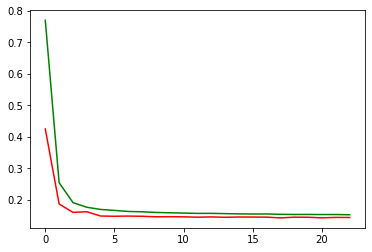

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='g')
plt.plot(history.history['val_loss'], color='r')

In [19]:
import utils
preds_on_trained = model.predict(x_test)
#utils.compare_predictions(preds_on_untrained, preds_on_trianed, y_test)

8/8 [==============================] - 0s 2ms/step


C:\Users\nnaho\anaconda3\envs\pythoncharmer\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


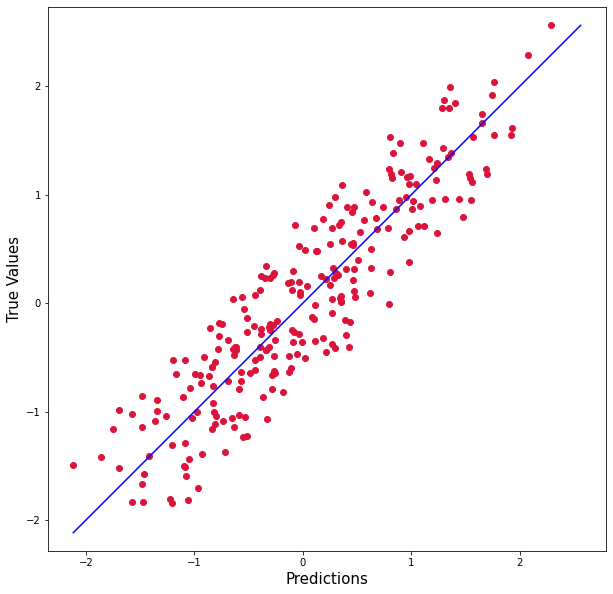

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(preds_on_trained, y_test, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(preds_on_trained), max(y_test))
p2 = min(min(preds_on_trained), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.ylabel('True Values', fontsize=15)
plt.xlabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

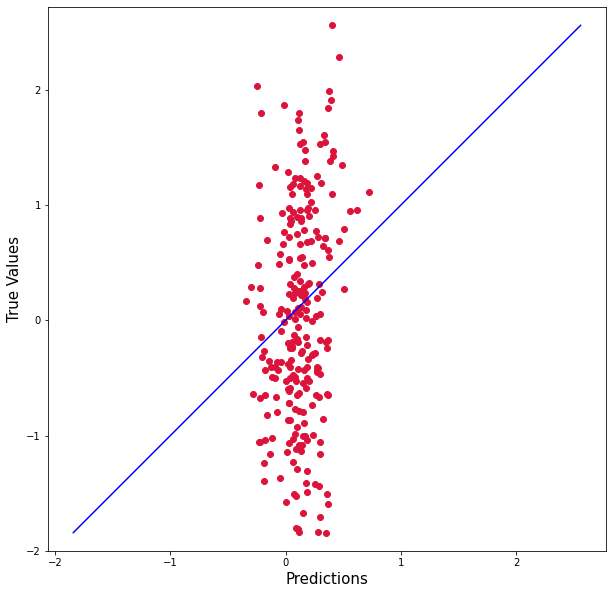

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(preds_on_untrained, y_test, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(preds_on_untrained), max(y_test))
p2 = min(min(preds_on_untrained), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.ylabel('True Values', fontsize=15)
plt.xlabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [22]:
price_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_trained = [convert_label_value(y) for y in preds_on_trained]
price_test = [convert_label_value(y) for y in y_test]

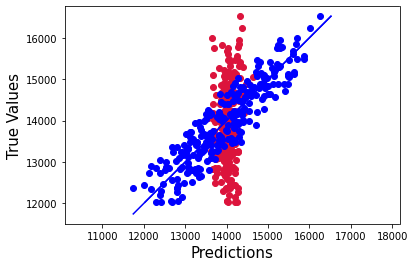

In [23]:
# plt.figure(figsize=(10, 10))
plt.subplot()
plt.scatter(price_untrained, price_test, c='crimson')
p1 = max(max(price_untrained), max(price_test))
p2 = min(min(price_untrained), min(price_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.ylabel('True Values', fontsize=15)
plt.xlabel('Predictions', fontsize=15)
plt.axis('equal')

plt.subplot()
plt.scatter(price_trained, price_test, c='blue')
p1 = max(max(price_trained), max(price_test))
p2 = min(min(price_trained), min(price_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.ylabel('True Values', fontsize=15)
plt.xlabel('Predictions', fontsize=15)
plt.axis('equal')

plt.show()